In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import csv
import pprint
from sklearn.cluster import KMeans,FeatureAgglomeration
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Others
import math
import datetime

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 16, 8

In [3]:
train_volume = pd.read_csv(
    '../datasets/train/volume(table_6)_training.csv', parse_dates=True, index_col=[0])
test_volume = pd.read_csv(
    '../datasets/test/volume(table_6)_test1.csv', parse_dates=True, index_col=[0])

volume = pd.concat([
    train_volume,
    test_volume
])
volume['counter'] = 1
volume['route'] = 'T' + \
    volume.tollgate_id.map(str) + 'D' + volume.direction.map(str)
del volume['tollgate_id']
del volume['direction']

del train_volume
del test_volume

train_weather = pd.read_csv(
    '../datasets/train/weather_(table_7)_training_update.csv')
test_weather = pd.read_csv(
    '../datasets/test/weather_(table_7)_test1.csv')

weather = pd.concat([
    train_weather,
    test_weather
])
del train_weather
del test_weather

In [8]:
new_group_vol = volume.groupby(
    ['route', 'vehicle_model','has_etc']).resample('20min').count()['counter'].unstack().T

new_group_vol = new_group_vol.fillna(0).astype(int)

new_group_vol.index = pd.MultiIndex.from_arrays(
    [new_group_vol.index.date, new_group_vol.index.time], names=['date', 'time'])


In [9]:
new_group_vol

route               T1D0                              ... T3D1               \
vehicle_model          0   1      2     3     4     5 ...    2  3     4       
has_etc                0   0   1  0  1  0  1  0  1  0 ...    1  0  1  0   1   
date       time                                       ...                     
2016-09-19 00:00:00    0   6   4  1  0  0  0  0  0  2 ...    0  3  1  0   5   
           00:20:00    0   5   1  0  0  0  0  0  0  0 ...    4  0  2  0   3   
           00:40:00    0   5   1  1  0  0  0  1  0  1 ...    1  4  3  0   3   
           01:00:00    0   6   1  0  0  0  0  0  0  3 ...    0  0  0  0   0   
           01:20:00    1   7   3  1  0  1  0  0  0  1 ...    0  0  0  0   0   
           01:40:00    0   9   0  0  0  0  0  0  0  1 ...    0  0  0  0   0   
           02:00:00    0   2   1  1  0  0  0  1  0  2 ...    0  0  0  0   0   
           02:20:00    0   2   1  5  0  0  0  0  0  2 ...    0  1  0  0   0   
           02:40:00    0   0   0  1  0  3  0  1  0  1 ...    0  0  0  0   0   
           03:00:00    0   5   0  2  0  0  0  0  0  2 ...    0  0  0  0   0   
           03:20:00    0   2   1  0  0  1  0  0  0  0 ...    0  1  0  0   0   
           03:40:00    0   3   2  1  0  2  0  0  0  1 ...    0  1  0  1   0   
           04:00:00    0   6   0  2  0  1  0  0  0  1 ...    0  0  0  1   0   
           04:20:00    0   9   0  2  0  1  0  0  0  1 ...    0  1  0  0   0   
           04:40:00    0   8   0  2  0  1  0  0  0  1 ...    0  1  0  1   0   
           05:00:00    0   0   0  2  0  0  0  0  0  0 ...    0  1  0  0   0   
           05:20:00    0   4   2  2  0  0  0  0  0  0 ...    0  0  0  0   0   
           05:40:00    0  10   2  1  0  0  0  0  0  0 ...    0  2  0  0   0   
           06:00:00    0   6   1  0  0  0  1  0  0  0 ...    0  2  0  0   0   
           06:20:00    0   7   5  1  0  0  0  0  0  0 ...    2  1  0  1   2   
           06:40:00    0  21   7  2  0  0  1  0  1  0 ...    1  2  0  0   0   
           07:00:00    0  26   8  3  0  0  1  0  1  0 ...    0  1  0  1   1   
           07:20:00    0  19  11  1  0  0  0  0  0  0 ...    0  1  0  0   1   
           07:40:00    0  26  14  1  1  0  1  0  0  0 ...    0  1  1  0   0   
           08:00:00    0  27  15  2  1  0  1  0  0  0 ...    0  1  1  0   0   
           08:20:00    0  35  14  4  0  0  2  0  1  0 ...    2  3  1  0  13   
           08:40:00    9  22   8  1  0  0  1  0  0  0 ...    1  1  1  0   1   
           09:00:00    0  28  16  4  2  0  0  0  0  0 ...    1  0  3  0   1   
           09:20:00    0  32   9  7  0  0  0  0  1  0 ...    0  0  6  0   0   
           09:40:00    0  39   3  2  0  0  0  0  0  0 ...    1  0  3  0   0   
...                  ...  ..  .. .. .. .. .. .. .. .. ...  ... .. .. ..  ..   
2016-10-24 07:00:00    0  25   6  2  0  0  0  0  2  0 ...    0  1  0  1   0   
           07:20:00    0  17  11  6  0  0  0  0  0  0 ...    1  1  0  0   1   
           07:40:00    0  25  13  3  1  0  1  0  0  0 ...    0  0  1  0   0   
           08:00:00    0   0   0  0  0  0  0  0  0  0 ...    0  0  0  0   0   
           08:20:00    0   0   0  0  0  0  0  0  0  0 ...    0  0  0  0   0   
           08:40:00    0   0   0  0  0  0  0  0  0  0 ...    0  0  0  0   0   
           09:00:00    0   0   0  0  0  0  0  0  0  0 ...    0  0  0  0   0   
           09:20:00    0   0   0  0  0  0  0  0  0  0 ...    0  0  0  0   0   
           09:40:00    0   0   0  0  0  0  0  0  0  0 ...    0  0  0  0   0   
           10:00:00    0   0   0  0  0  0  0  0  0  0 ...    0  0  0  0   0   
           10:20:00    0   0   0  0  0  0  0  0  0  0 ...    0  0  0  0   0   
           10:40:00    0   0   0  0  0  0  0  0  0  0 ...    0  0  0  0   0   
           11:00:00    0   0   0  0  0  0  0  0  0  0 ...    0  0  0  0   0   
           11:20:00    0   0   0  0  0  0  0  0  0  0 ...    0  0  0  0   0   
           11:40:00    0   0   0  0  0  0  0  0  0  0 ...    0  0  0  0   0   
           12:00:00    0   0   0  0  0  0  0  0  0

In [360]:
new_group_vol['cluster'] = cluster

In [361]:
dc = DecisionTreeClassifier(max_depth=100,criterion='entropy')

In [364]:
dc.fit(new_group_vol[['vehicle_model','has_etc','time']],new_group_vol['cluster'])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [366]:
dc.score(new_group_vol[['vehicle_model','has_etc','time']],new_group_vol['cluster'])

0.98549768518518521

In [367]:
new_group_vol.cluster.value_counts()

0    1610544
1    1595217
2     163839
Name: cluster, dtype: int64

In [368]:
pd.Series(dc.predict(new_group_vol[['vehicle_model','has_etc','time']]).astype(int)).value_counts()

0    1618500
1    1602900
2     148200
dtype: int64

In [340]:
holidays_index = pd.date_range('2016-9-30', '2016-10-9',freq='20min')

In [369]:
volume['vehicle_type_predict'] = dc.predict(volume[['vehicle_model','has_etc','time']]).astype(int)

KeyError: "['time'] not in index"

In [4]:
volume_grouped = volume.groupby(
    ['route', 'vehicle_type_predict']).resample('20min').count()['counter']

KeyError: 'vehicle_type_predict'

In [343]:
volume_grouped = volume_grouped.unstack().fillna(0).astype(int).T

In [344]:
volume_grouped = volume_grouped.loc[volume_grouped.index.date <= datetime.date(2016, 10, 17)]

In [345]:
volume_grouped = volume_grouped.between_time('6:00', '18:40')

In [346]:
volume_grouped['time'] = volume_grouped.index.map(lambda dt:str(dt.time()))

In [347]:
volume_grouped

route                T1D0     T1D1      T2D0     T3D0      T3D1           time
vehicle_type_predict    0   1    0    1    0   1    0    1    0    1          
time                                                                          
2016-09-19 06:00:00     2   6   18   21   13  17   19   20   16   14  06:00:00
2016-09-19 06:20:00     6   7   21   36   14  22   32   26   17   21  06:20:00
2016-09-19 06:40:00    11  21   31   41   19  18   32   39   22   43  06:40:00
2016-09-19 07:00:00    13  26   30   40   36  48   65   62   22   45  07:00:00
2016-09-19 07:20:00    12  19   29   54   42  38   49   74   26   45  07:20:00
2016-09-19 07:40:00    17  26   45   73   40  57   67   86   38   65  07:40:00
2016-09-19 08:00:00    19  27   42   81   48  81   74   87   53   65  08:00:00
2016-09-19 08:20:00    21  35   33   86   48  74   63  104   62  106  08:20:00
2016-09-19 08:40:00    19  22   39   77   36  62   61   77   77   84  08:40:00
2016-09-19 09:00:00    22  28   39   81   20  69   68  106   54   91  09:00:00
2016-09-19 09:20:00    17  32   49  102   21  57   40  104   30   95  09:20:00
2016-09-19 09:40:00     5  39   45   86   12  47   51   97   31   85  09:40:00
2016-09-19 10:00:00    13  31   34   67   20  51   46   58   35   82  10:00:00
2016-09-19 10:20:00     7  37   31   74   34  54   46   65   26   61  10:20:00
2016-09-19 10:40:00    12  32   33   69   24  41   52   70   29   56  10:40:00
2016-09-19 11:00:00    15  24   38   48   23  27   44   67   30   43  11:00:00
2016-09-19 11:20:00    10  20   25   51   21  40   33   49   31   41  11:20:00
2016-09-19 11:40:00    11  23   43   57   15  31   36   55   26   47  11:40:00
2016-09-19 12:00:00    10  35   36   63   33  54   46   58   30   64  12:00:00
2016-09-19 12:20:00    15  29   23   47   32  34   43   48   30   56  12:20:00
2016-09-19 12:40:00    21  32   31   48   26  43   36   86   27   67  12:40:00
2016-09-19 13:00:00    24  33   33   67   35  46   44   73   27   64  13:00:00
2016-09-19 13:20:00    23  38   42   66   38  57   45   62   34   76  13:20:00
2016-09-19 13:40:00    19  34   37   69   31  36   53   78   27   73  13:40:00
2016-09-19 14:00:00    19  36   32   69   25  41   41   59   39   56  14:00:00
2016-09-19 14:20:00    15  37   38   62   22  40   38   46   34   65  14:20:00
2016-09-19 14:40:00    17  35   32   69   27  52   47   60   28   65  14:40:00
2016-09-19 15:00:00    18  30   21   56   34  43   49   68   22   53  15:00:00
2016-09-19 15:20:00    11  46   33   71   24  43   44   65   24   71  15:20:00
2016-09-19 15:40:00    15  28   29   63   26  48   51   64   24   59  15:40:00
...                   ...  ..  ...  ...  ...  ..  ...  ...  ...  ...       ...
2016-10-17 09:00:00    12  31   65   96   45  69   44   94   53   83  09:00:00
2016-10-17 09:20:00    18  36   36   84   36  66   56   94   43   94  09:20:00
2016-10-17 09:40:00    16  25   36   85   25  66   42   75   33   73  09:40:00
2016-10-17 10:00:00    11  35   32   69   27  38   59   68   33   45  10:00:00
2016-10-17 10:20:00    25  32   34   67   24  41   44   64   21   56  10:20:00
2016-10-17 10:40:00     9  29   32   58   28  30   31   55   27   57  10:40:00
2016-10-17 11:00:00     9  20   27   35   32  31   42   60   19   60  11:00:00
2016-10-17 11:20:00    13  26   27   46   24  30   35   54   26   53  11:20:00
2016-10-17 11:40:00     6  27   48   59   20  30   47   41   23   48  11:40:00
2016-10-17 12:00:00    13  19   27   60   25  41   36   53   22   55  12:00:00
2016-10-17 12:20:00    15  32   28   59   17  37   35   43   22   53  12:20:00
2016-10-17 12:40:00    12  32   33   54   24  46   36   54   41   70  12:40:00
2016-10-17 13:00:00    10  25   32   56   18  44   42   66   41   86  13:00:00
2016-10-17 13:20:00    16  35   28   72   24  47   43   50   37   54  13:20:00
2016-10-17 13:40:00    15  44   39   46   17  49   40   55   21   52  13:40:00
2016-10-17 14:00:00    18  23   28   59   36  46   44   70   22   53  14:00:00
2016-10-17 14:20:00    19  28   21   72   26  46  

In [348]:
non_holidays_index = volume_grouped.index.difference(holidays_index)

In [217]:
# volume_grouped.index = pd.MultiIndex.from_arrays(
#     [volume_grouped.index.date, volume_grouped.index.time], names=['date', 'time'])

In [350]:
volume_grouped[('T1D1',0)].count()

1131

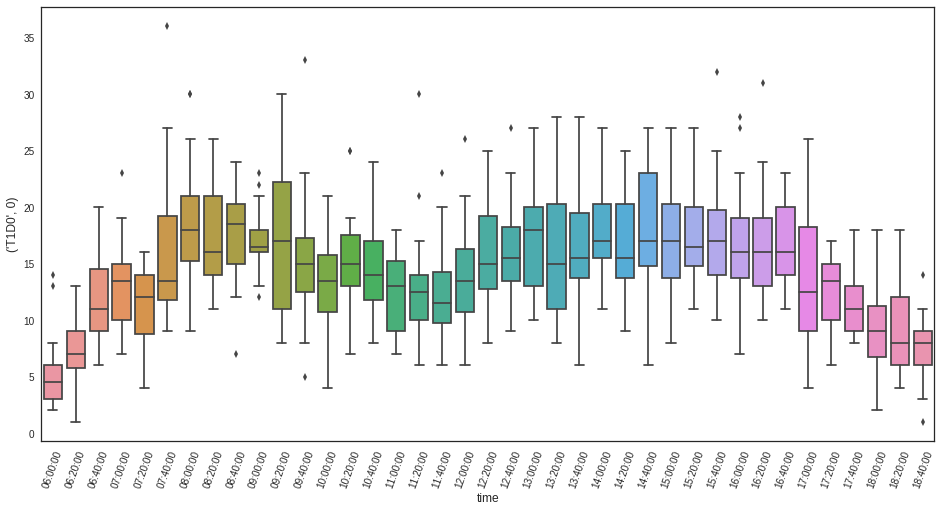

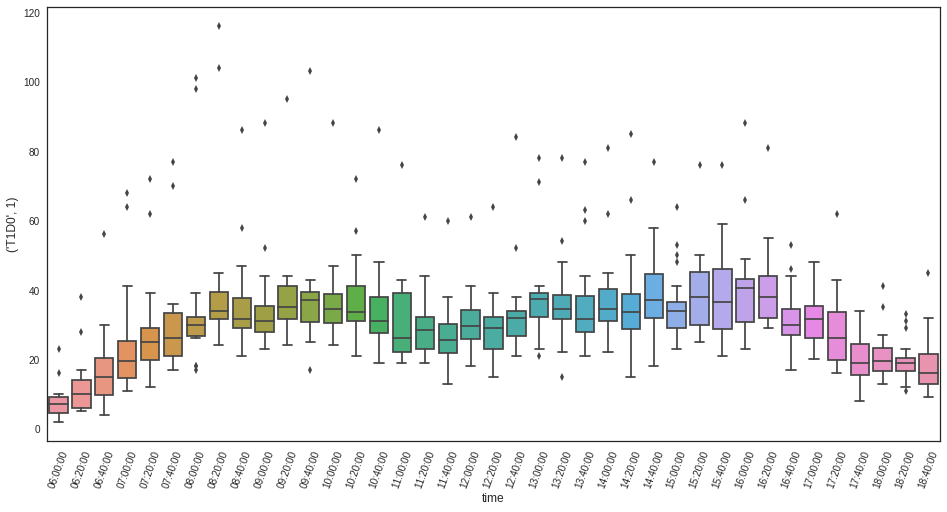

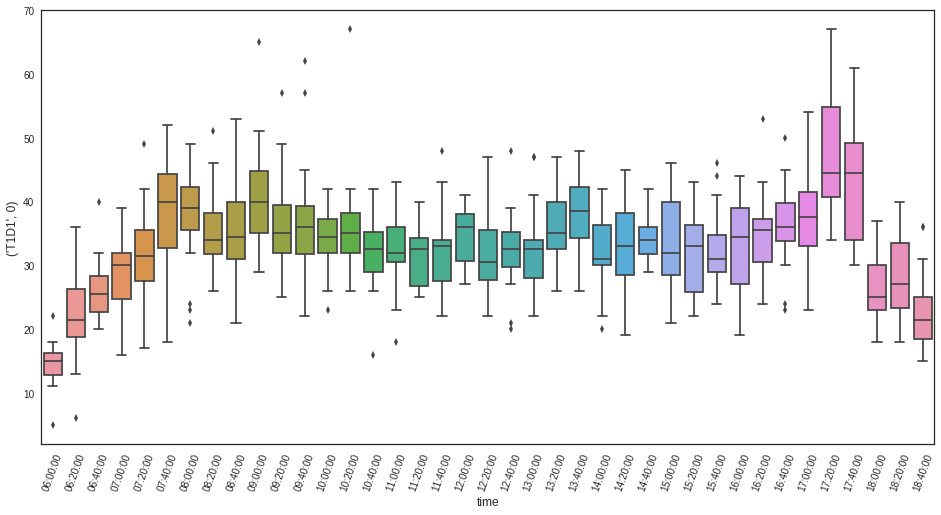

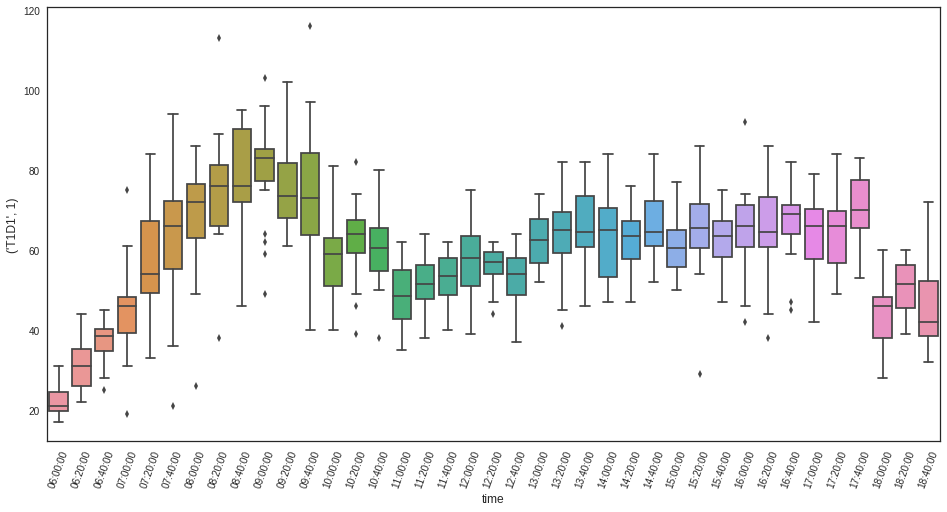

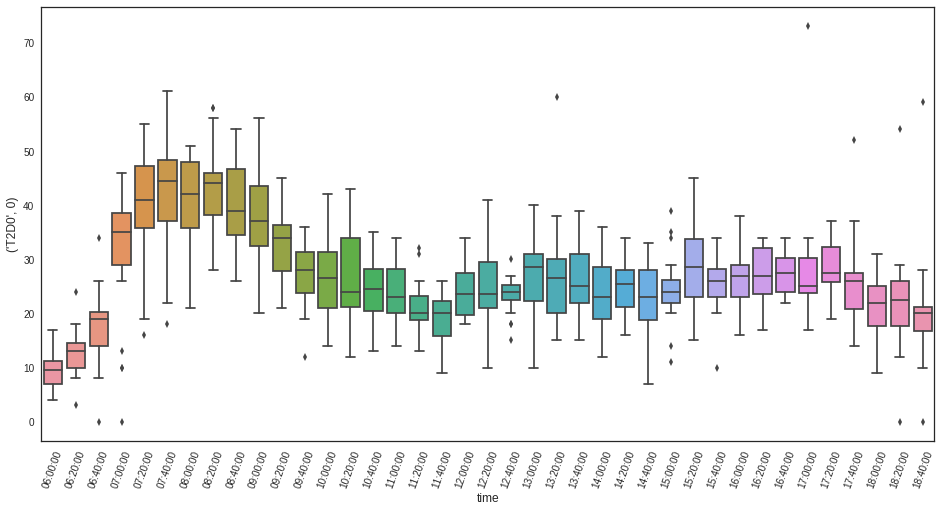

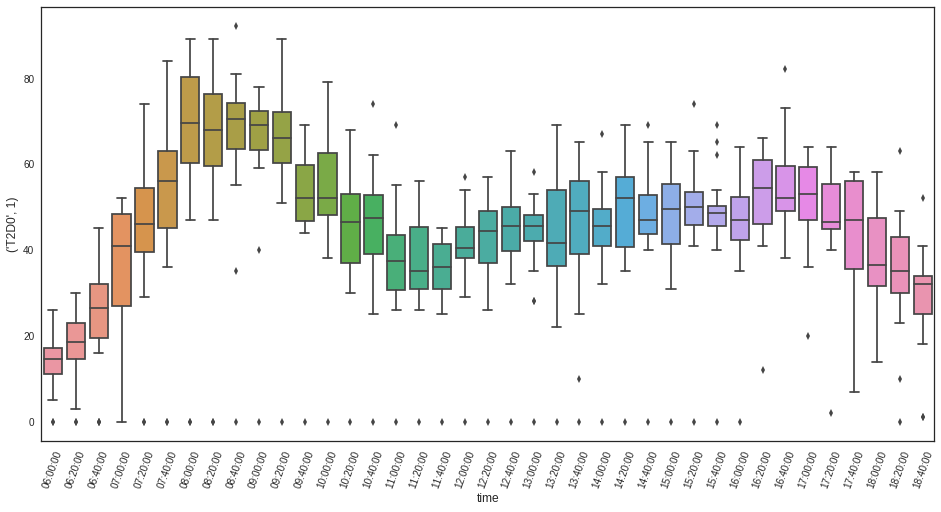

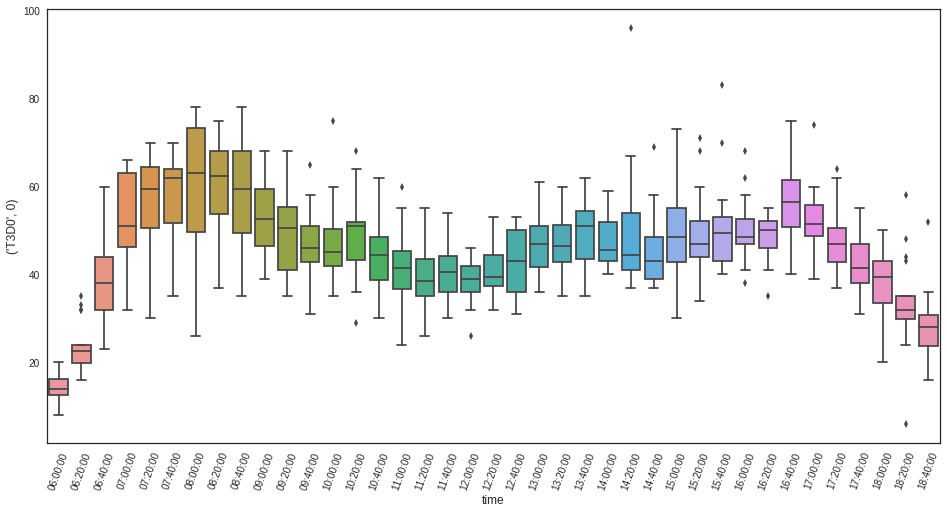

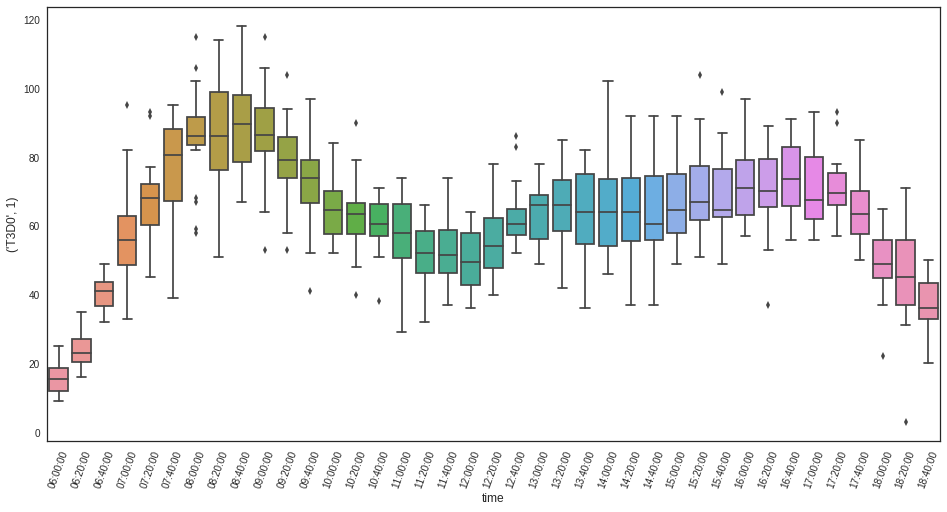

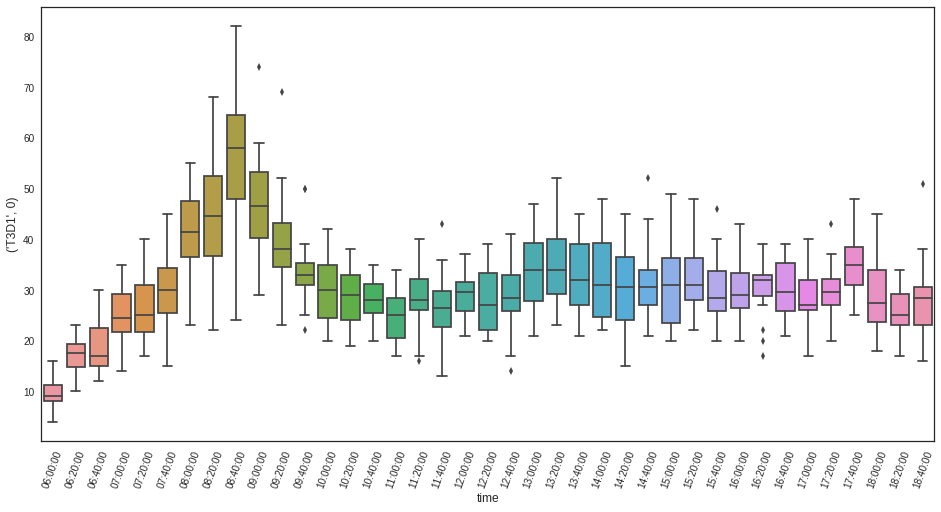

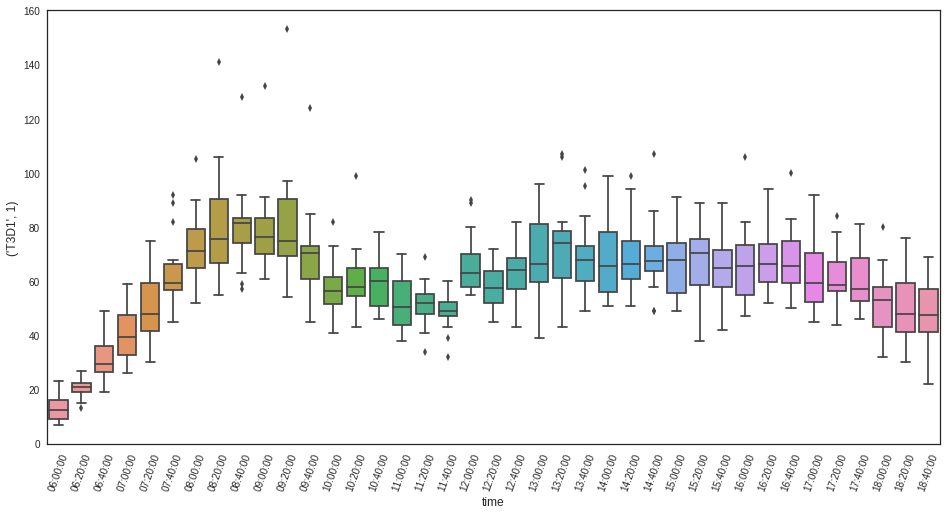

In [351]:
for col in volume_grouped.columns[:-1]:
    ax = sns.boxplot(data=volume_grouped.loc[non_holidays_index],x='time',y=col)
    plt.setp(ax.get_xticklabels(), rotation=70)
    plt.figure()